# Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [2]:
df= pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Weight')

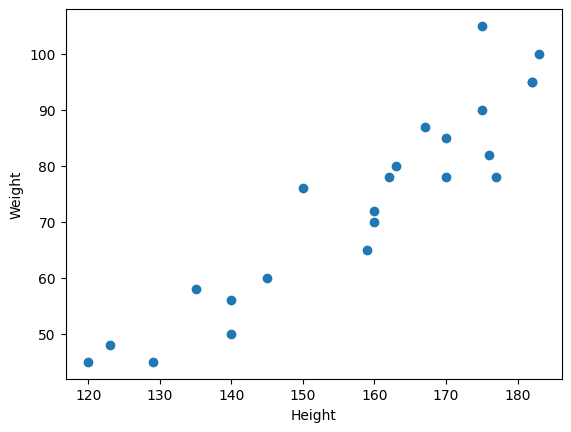

In [4]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [5]:
## divide our dataset into independent and dependent features
x= df[['Weight']]  ## independent feature 
y= df[['Height']]  ## dependent feature


In [7]:
x.shape,y.shape

((23, 1), (23, 1))